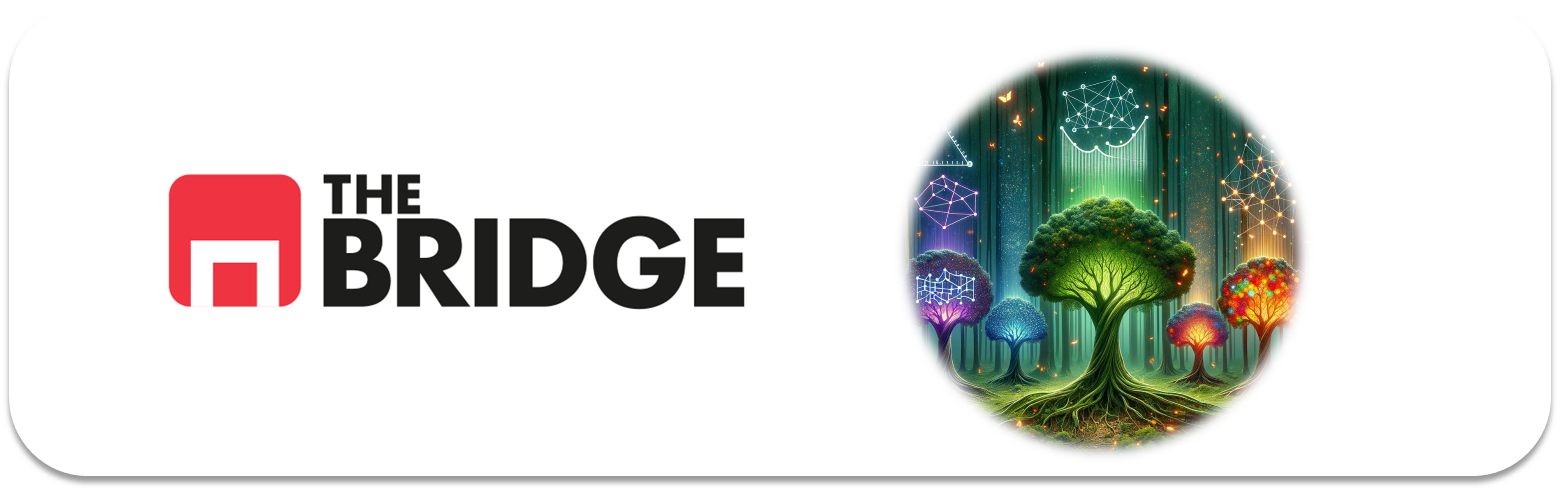

## PRACTICA OBLIGATORIA: **"Ensemble" de modelos: bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en mujeres de ascendencia india en EEUU. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

In [1]:
# Bagging -> Bootstrap Aggregation -> Paralelo -> selección aleatoria repetición
# Pasting -> División sin repetición -> Paralelo 
# Boosting -> Secuenciales 

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import bootcampviztools as bt

import pandas as pd
import numpy as np
import seaborn as sns

pd.options.mode.copy_on_write = True

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


In [4]:
df = pd.read_csv(url, header = None, names = names)
df

,preg,plas,press,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   press   768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

preg      17
plas     136
press     47
skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

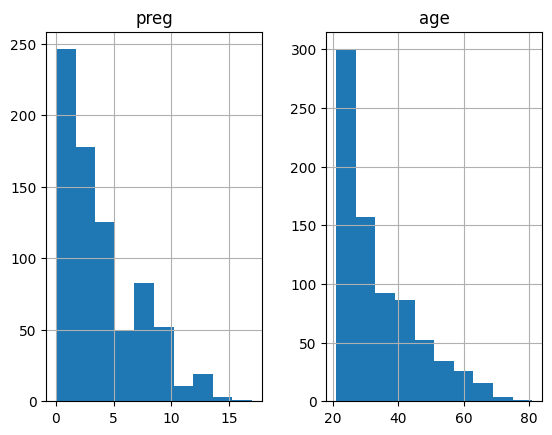

In [7]:
df[["preg","age"]].hist()

In [8]:
df.preg.value_counts()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

*Preg puede ser numérica o categórica, la analizaré de las dos formas contra el target, pero de momento todas numéricas*

In [9]:
target = "class"

In [10]:
features_num = df.columns.to_list()
features_num.remove(target)

In [11]:
features_num

['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age']

In [12]:
## Distribución del target

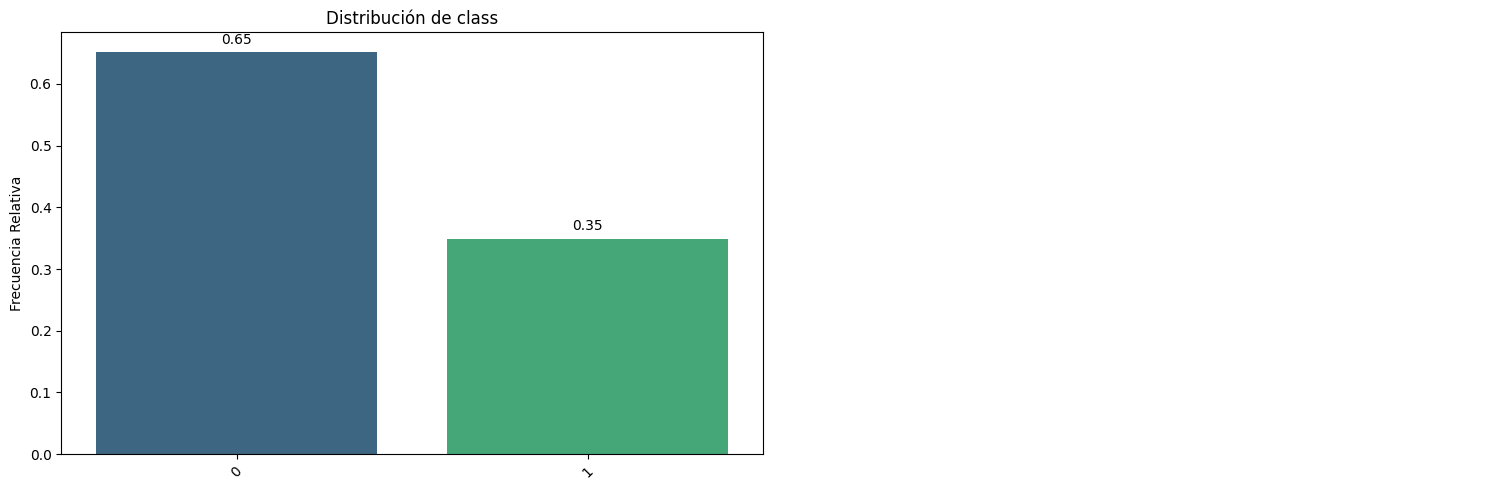

In [13]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

*Ligeramente desbalanceado, no haré nada en especial, salvo tocar el hiperparámetro correspondiente al peso de las clases*

## Train-Test

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    614 non-null    int64  
 1   plas    614 non-null    int64  
 2   press   614 non-null    int64  
 3   skin    614 non-null    int64  
 4   test    614 non-null    int64  
 5   mass    614 non-null    float64
 6   pedi    614 non-null    float64
 7   age     614 non-null    int64  
 8   class   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [ ]:
# ¿Tiene sentido tener nulos/0 en todas nuestras variables?
# Estos ceros no representan mediciones reales, sino valores faltantes codificados como 0
train_set.describe()

,preg,plas,press,skin,test,mass,pedi,age,class
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,121.815961,72.229642,28.568404,138.115635,32.348208,0.469168,32.907166,0.346906
std,3.313264,30.104012,12.099278,8.410029,88.650282,6.935618,0.336847,11.503437,0.476373
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,24.000000,116.000000,27.325000,0.241500,24.000000,0.000000
50%,3.000000,118.000000,72.000000,28.500000,120.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
tienen_nulos = ["plas","press","skin","test","mass"]

In [18]:
train_set[tienen_nulos] = train_set[tienen_nulos].replace(0, np.nan)
test_set[tienen_nulos] = test_set[tienen_nulos].replace(0, np.nan)

In [19]:
df[tienen_nulos].median()

plas     117.0
press     72.0
skin      23.0
test      30.5
mass      32.0
dtype: float64

In [20]:
# df.fillna(serie_medianas, axis=1)

In [21]:
from sklearn.impute import SimpleImputer

# 3. Imputamos la mediana en las columnas con missings (fit solo sobre train, transform sobre ambas)
imp = SimpleImputer(strategy="median")

train_set[tienen_nulos] = imp.fit_transform(train_set[tienen_nulos])
test_set[tienen_nulos]  = imp.transform(test_set[tienen_nulos])

In [22]:
train_set[tienen_nulos].isna().sum()

plas     0
press    0
skin     0
test     0
mass     0
dtype: int64

In [23]:
## Análisis contra el target

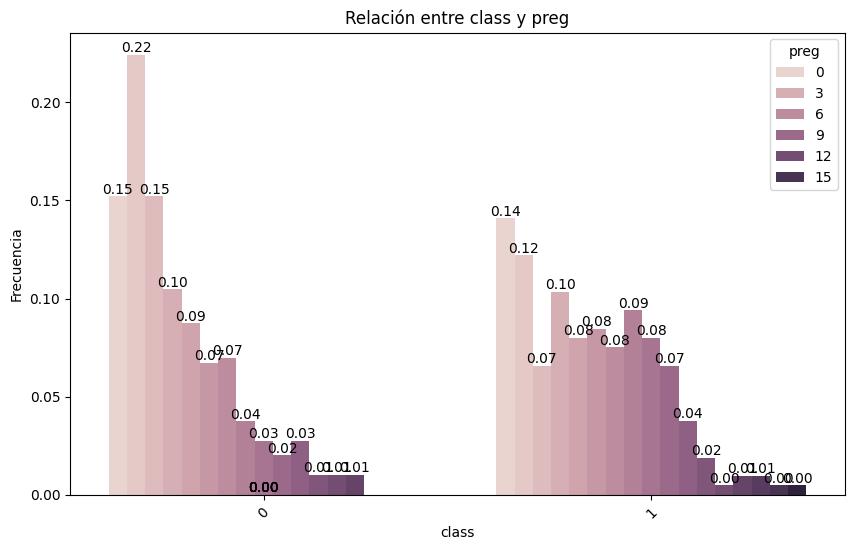

In [24]:
bt.plot_categorical_relationship_fin(train_set, target, "preg", relative_freq= True, show_values= True)

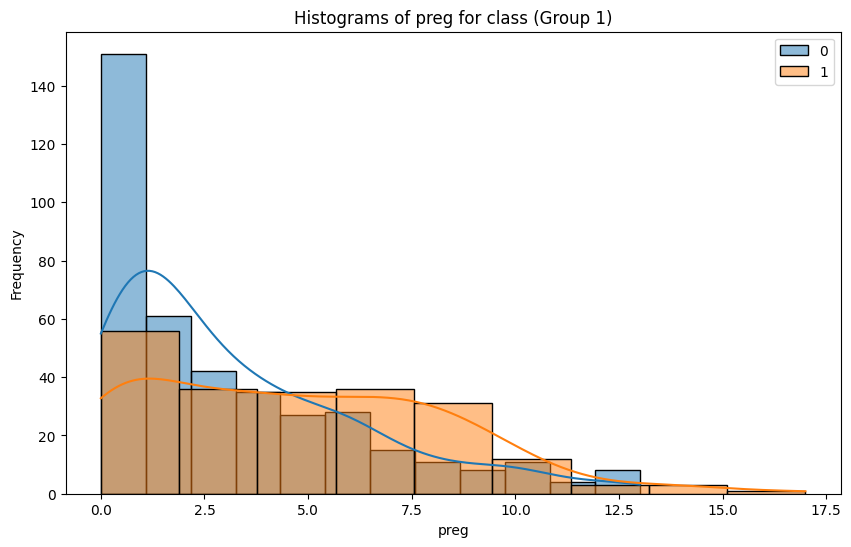

In [25]:
bt.plot_grouped_histograms(train_set, cat_col= target, num_col= "preg", group_size= 3)

*No vemos motivos para cambiar preg a categórica así que continuamos como numérica, por tanto -> Todas las variables numéricas*

In [26]:
features_num

['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age']

In [27]:
# sns.pairplot(train_set, hue=target)

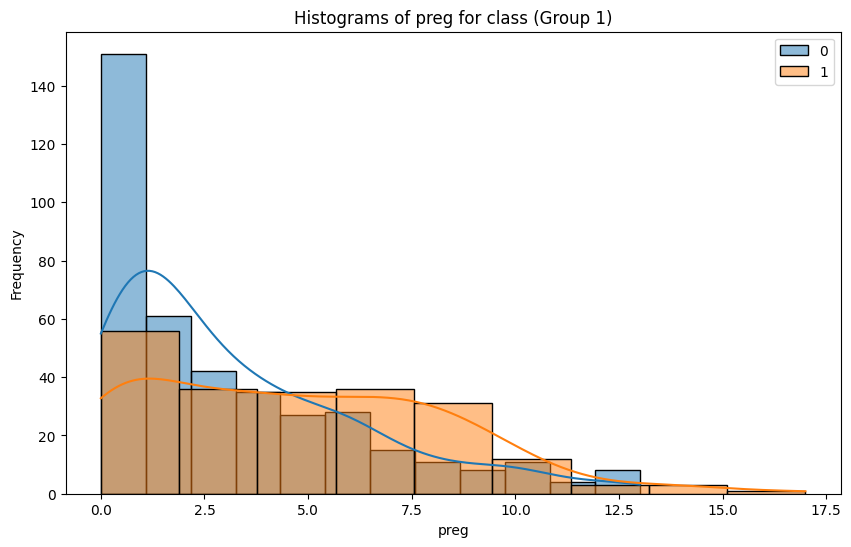

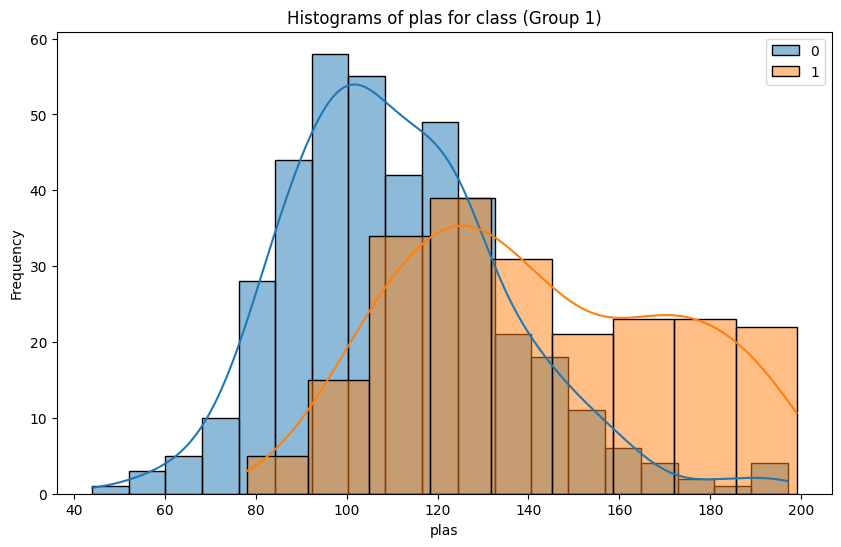

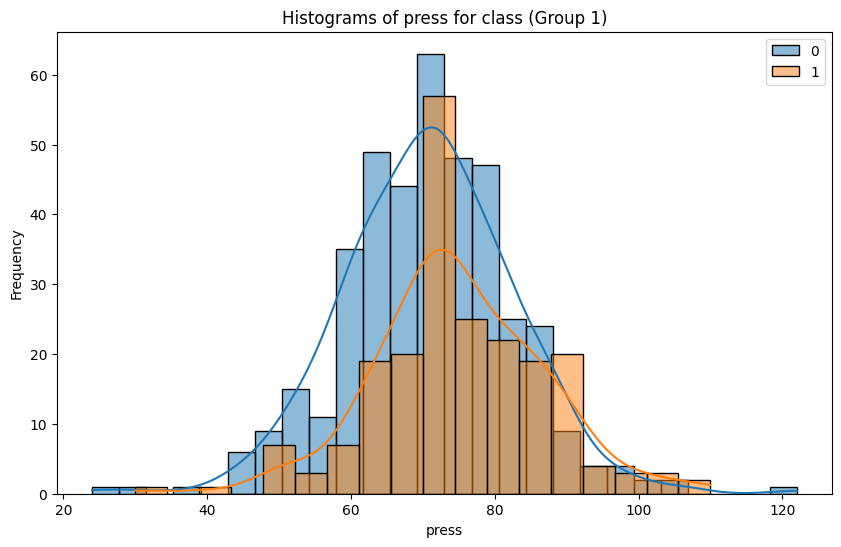

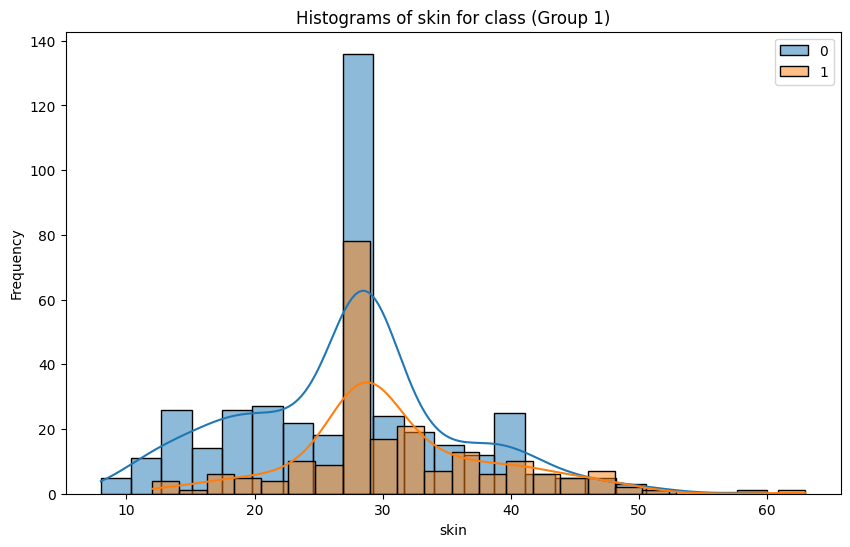

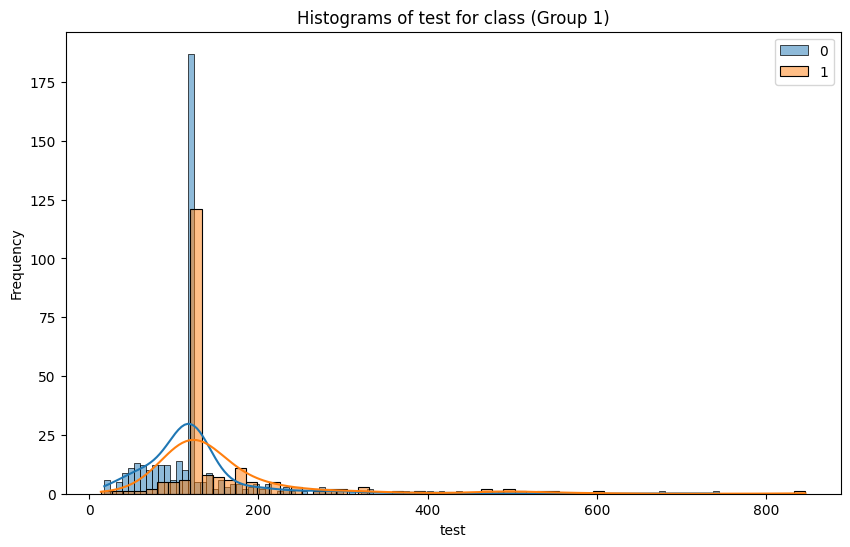

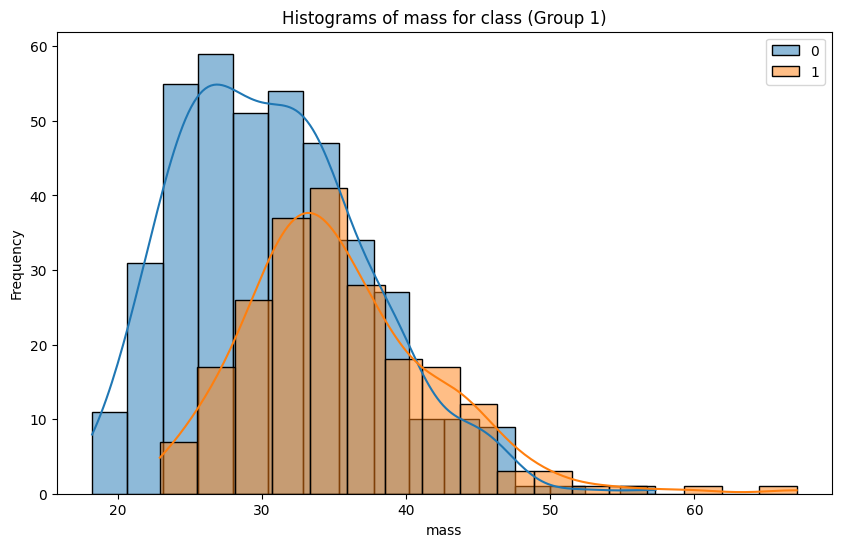

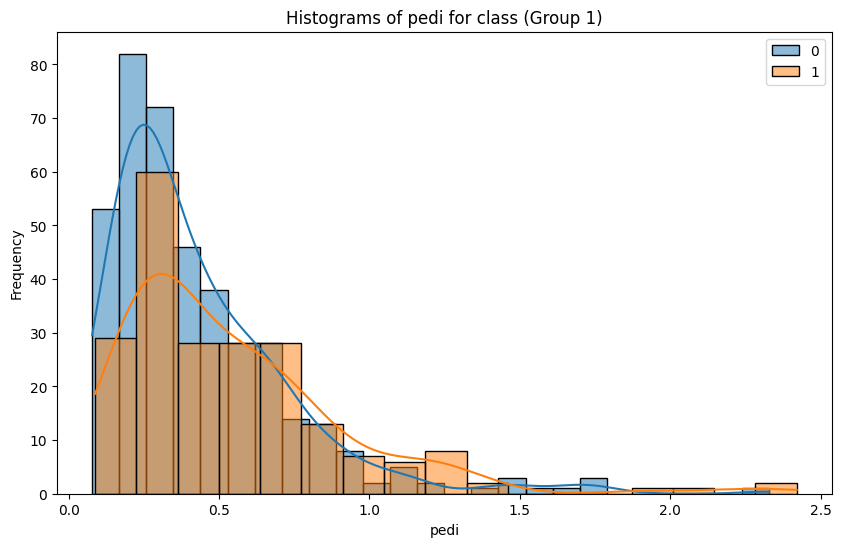

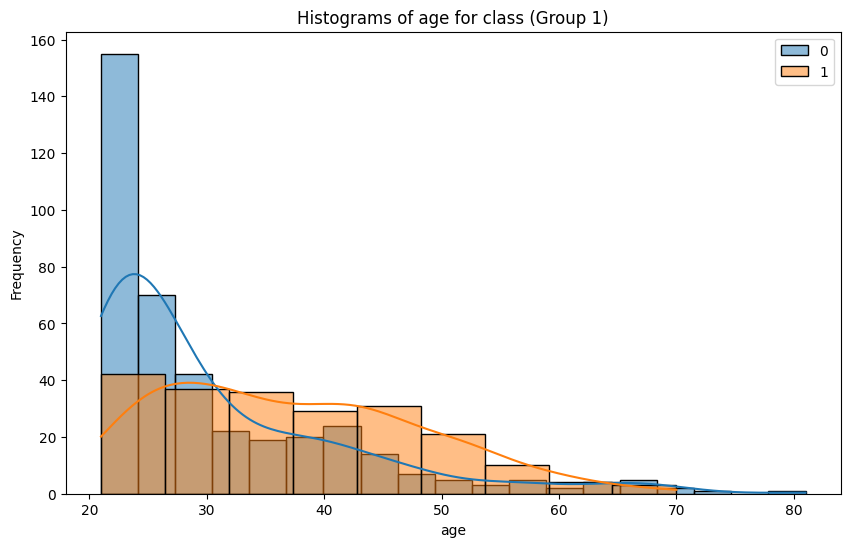

In [28]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 3)

*Vamos a considerar todas aunque pensamos que plas, mass, preg (y puede que age) serán las más predictoras, pero lo comprobaremos con el feature_importance de RandomForest*

In [29]:
# features_num_sel1 = ["age", "plas", "preg", "mass"]
# features_num_sel2 = features_num - features_num_sel1

*Como vamos a usar árboles hasta como baseline, no necesitamos transformar ni escalar*

In [30]:
X_train = train_set[features_num]
y_train = train_set[target]

X_test = test_set[features_num]
y_test = test_set[target]

In [31]:
X_train

,preg,plas,press,skin,test,mass,pedi,age
60,2,84.0,72.0,28.5,120.0,32.0,0.304,21
618,9,112.0,82.0,24.0,120.0,28.2,1.282,50
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0,161.0,50.0,28.5,120.0,21.9,0.254,65
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1,96.0,122.0,28.5,120.0,22.4,0.207,27
270,10,101.0,86.0,37.0,120.0,45.6,1.136,38
435,0,141.0,72.0,28.5,120.0,42.4,0.205,29


In [32]:
from sklearn.ensemble import RandomForestClassifier # bagging - boostrap aggregation
from xgboost import XGBClassifier # boosting
from lightgbm import LGBMClassifier # boosting

base_clf = RandomForestClassifier(max_depth = 5, random_state= 42)

In [33]:
cross_val_score(base_clf, X_train, y_train, cv = 5, scoring= "balanced_accuracy")

array([0.68738977, 0.76482558, 0.71031977, 0.69244186, 0.73630952])

In [34]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Recall medio:", np.mean(cross_val_score(base_clf, X_train, y_train, cv = 5, scoring= "balanced_accuracy")))

Recall medio: 0.7182573007669907


In [35]:
base_clf

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
base_clf.fit(X_train, y_train) # Para el feature Importance

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
print(classification_report(y_train, base_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       401
           1       0.85      0.72      0.78       213

    accuracy                           0.86       614
   macro avg       0.86      0.83      0.84       614
weighted avg       0.86      0.86      0.86       614



In [38]:
base_clf.feature_importances_

array([0.05549472, 0.33800084, 0.04584832, 0.04984747, 0.10507137,
       0.17583607, 0.07477862, 0.15512259])

In [39]:
base_clf.feature_names_in_

array(['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age'],
      dtype=object)

In [40]:
pd.DataFrame({"features": base_clf.feature_names_in_, "importance": base_clf.feature_importances_}).sort_values("importance",ascending = False)

,features,importance
1,plas,0.338001
5,mass,0.175836
7,age,0.155123
4,test,0.105071
6,pedi,0.074779
0,preg,0.055495
3,skin,0.049847
2,press,0.045848


Pues aquí tenemos el orden de importancia de las variables para nuestro modelo de partida o baseline  
Efectivamente plas, mass y age son las más predictoras, pero ojo porque preg pensábamos que sería más importante !!

In [41]:
# Bagging - RandomForest
# Boosting - XGBoost; LightGBM

In [41]:
xgb_clf = XGBClassifier(max_depth = 5, 
                        random_state = 42)

lgb_clf = LGBMClassifier(max_depth= 5, 
                         random_state = 42, 
                         verbose = -1,
                         n_jobs= -1)

In [42]:
for nombre, modelo in zip(["Random Forest","XGboost","LightGBM"],[base_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    print("Recall medio:", np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")))

Para Random Forest: Recall medio: 0.7182573007669907
Para XGboost: Recall medio: 0.736262971166072
Para LightGBM: Recall medio: 0.7258451253024896


*Seleccionamos XGBoost y lo optimizamos, si tienes tiempo es mejor optimizar todos y comparar el mejor modelo de cada uno (ojo usando el best_score del Grid o del RandomizeSearch que ya lleva su cross_validation)*

In [43]:
train_set[train_set[target] == 0]

,preg,plas,press,skin,test,mass,pedi,age,class
60,2,84.0,72.0,28.5,120.0,32.0,0.304,21,0
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
294,0,161.0,50.0,28.5,120.0,21.9,0.254,65,0
340,1,130.0,70.0,13.0,105.0,25.9,0.472,22,0
718,1,108.0,60.0,46.0,178.0,35.5,0.415,24,0
...,...,...,...,...,...,...,...,...,...
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26,0
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
106,1,96.0,122.0,28.5,120.0,22.4,0.207,27,0


In [44]:
train_set

,preg,plas,press,skin,test,mass,pedi,age,class
60,2,84.0,72.0,28.5,120.0,32.0,0.304,21,0
618,9,112.0,82.0,24.0,120.0,28.2,1.282,50,1
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
294,0,161.0,50.0,28.5,120.0,21.9,0.254,65,0
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
106,1,96.0,122.0,28.5,120.0,22.4,0.207,27,0
270,10,101.0,86.0,37.0,120.0,45.6,1.136,38,1
435,0,141.0,72.0,28.5,120.0,42.4,0.205,29,1


In [45]:
len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]) # "balanced"

1.8826291079812207

In [68]:
# Investigar Coarse-to-fine para optimización de hiperparámetros

In [46]:
### XGBoost

param_grid = {
    "n_estimators": [100,200,400],
    "eta": [0.1,0.3,0.6,1], # Learning rate
    "max_depth": [1,6,10,None], # Stumps
    "min_child_weight": [1,10,20,100],
    "scale_pos_weight": [len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]), 1], # class_weight
    "colsample_bytree": [0.5, 1] # max_features sqrt, 
}

xgb_clf = XGBClassifier()

xgb_grid = GridSearchCV(xgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs= -1)

xgb_grid.fit(X_train,y_train)

,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'colsample_bytree': [0.5, 1], 'eta': [0.1, 0.3, ...], 'max_depth': [1, 6, ...], 'min_child_weight': [1, 10, ...], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [47]:
xgb_best = xgb_grid.best_estimator_
xgb_best

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'eta': 0.1,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 200,
 'scale_pos_weight': 1.8826291079812207}

In [49]:
xgb_grid.best_score_

0.7820971248103031

In [50]:
best_params = xgb_grid.best_params_ # Si queremos reentrenar un modelo con los mejores hiperparámetros lo podemos hacer así, aunque ya está entrenado en el best_estimator_

In [51]:
xgb_optimized_model = XGBClassifier(**best_params, random_state=42)
xgb_optimized_model.fit(X_train, y_train)
# xgb_clf = XGBClassifier(max_depth = 5,scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]))
# xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
xgb_optimized_model.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [53]:
print(classification_report(y_test, xgb_optimized_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        99
           1       0.58      0.78      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



*Dejo en las siguientes celdas dos grids posibles para ajustar los hiperparámetros de RandomForest y LightGBM*

In [54]:
### RandomForest

param_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [1,5,10,None],
    "min_samples_leaf": [1,10,20,100],
    "class_weight": ["balanced",None],
    "max_features": ["sqrt","log2",None]
}

rf_clf = RandomForestClassifier()

rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs= -1)

rf_grid.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'class_weight': ['balanced', None], 'max_depth': [1, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 10, ...], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [55]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 20,
 'n_estimators': 200}

In [56]:
rf_grid.best_score_

0.7817083487141626

In [57]:
rf_grid.best_estimator_.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [58]:
print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



In [ ]:
### LightGBM

param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight": ["balanced",None],
    "max_bin": [40,80,100]
}

lgb_clf = LGBMClassifier(verbosity= -100)

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(X_train,y_train)

In [60]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_bin': 80,
 'max_depth': 1,
 'min_data_in_leaf': 20,
 'n_estimators': 200}

In [61]:
lgb_grid.best_score_

0.7797561113161888

In [62]:
lgb_grid.best_estimator_.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [63]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.60      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154



Repasemos las métricas de los tres modelos optimizados

In [64]:
for nombre, modelo in zip(["XGboost","Random Forest","LightGBM"],[xgb_grid.best_score_, rf_grid.best_score_, lgb_grid.best_score_]):
    print(f"Para {nombre}: {modelo}")

Para XGboost: 0.7820971248103031
Para Random Forest: 0.7817083487141626
Para LightGBM: 0.7797561113161888


In [65]:
print(classification_report(y_test, xgb_optimized_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        99
           1       0.58      0.78      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



In [66]:
print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



In [67]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.60      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154



*Finalmente, el Random Forest optimizado tiene las mejores métricas en validación cruzada y en evaluación contra el test, y es el modelo con menor complejidad de los tres :-)*